## MBTI Prediction from Social Media Platforms
LIN371: Machine Learning for Text Analysis

Predict MBTI personality types using data from self-reported Reddit and Twitter data. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
reddit_df = pd.read_csv('mbti-reddit.csv')
reddit_df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


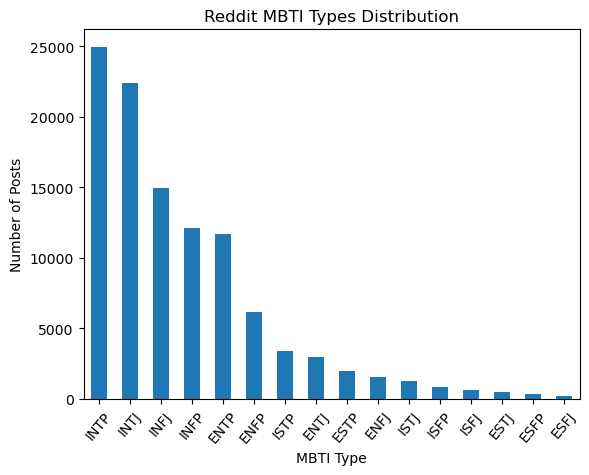

In [10]:
# Distribution of MBTI types in Reddit dataset
reddit_types = reddit_df.groupby('type')
reddit_types.describe().head()

plt.figure()
reddit_types.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('MBTI Type')
plt.ylabel('Number of Posts')
plt.title('Reddit MBTI Types Distribution')
plt.show()

In [11]:
twitter_df = pd.read_csv('mbti-twitter.csv')
twitter_df.head()


,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


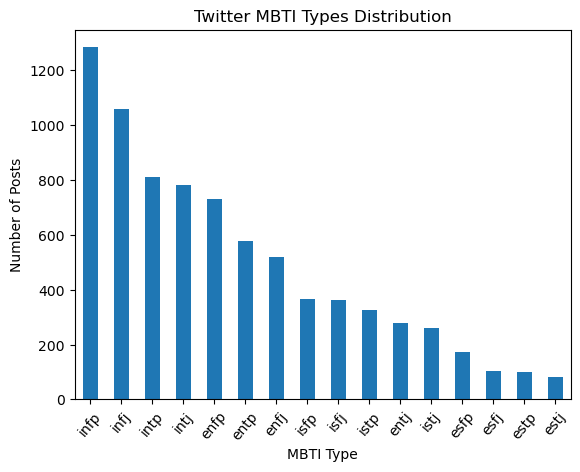

In [12]:
# Distribution of MBTI types in Twitter dataset
twitter_types = twitter_df.groupby('label')
twitter_types.describe().head()

plt.figure()
twitter_types.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel('MBTI Type')
plt.ylabel('Number of Posts')
plt.title('Twitter MBTI Types Distribution')
plt.show()

In [2]:
import re
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE

In [11]:
STOP_WORDS = nltk.corpus.stopwords.words('english')

def clean_sentence(val):
    # remove chars that are not letters or numbers, downcase, then remove stop words
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    # drop nans, then apply 'clean_sentence'  
    data = data.dropna(how="any")

    data['posts'] = data['posts'].apply(clean_sentence)
    
    return data

reddit_df = clean_dataframe(reddit_df)
reddit_df.head(5)

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [13]:
def build_corpus(data):
    # Creates a list of lists containing words from each sentence
    corpus = []
    for post in data['posts'].items():
        word_list = post[1].split(" ")
        corpus.append(word_list)
            
    return corpus

reddit_corpus = build_corpus(reddit_df)        
reddit_corpus[0:2]

[['know',
  'intj',
  'tool',
  'use',
  'interaction',
  'people',
  'excuse',
  'antisocial',
  'truly',
  'enlighten',
  'mastermind',
  'know',
  'would',
  'count',
  'pet',
  'peeze',
  'something',
  'time',
  'matter',
  'people',
  'either',
  'whether',
  'group',
  'people',
  'mall',
  'never',
  'see',
  'best',
  'friend',
  'sit',
  'outside',
  'conversation',
  'jsut',
  'listen',
  'want',
  'interject',
  'sit',
  'formulate',
  'say',
  'wait',
  'inject',
  'argument',
  'thought',
  'find',
  'fascinate',
  'sit',
  'watch',
  'people',
  'talk',
  'people',
  'fascinate',
  'sit',
  'class',
  'watch',
  'different',
  'people',
  'find',
  'intrigue',
  'dad',
  'intj',
  'u',
  'stand',
  'look',
  'like',
  'line',
  'safeway',
  'watch',
  'people',
  'home',
  'talk',
  'people',
  'like',
  'think',
  'military',
  'job',
  'people',
  'voluntarily',
  'go',
  'job',
  'important',
  'show',
  'deference',
  'endanger',
  'live',
  'glorify',
  'way',
  'ci

In [15]:
reddit_model = word2vec.Word2Vec(reddit_corpus, vector_size=100, window=20, min_count=200, workers=4)
reddit_model.wv['love']

array([ 2.0223334 ,  4.0286865 , -1.6368145 , -0.17791297, -5.9347963 ,
        0.49390966, -0.00687721, -0.72007257, -0.7167353 , -0.4778932 ,
        3.0753565 ,  4.2931986 , -2.2583296 ,  2.2420232 , -2.6624944 ,
        6.2645187 ,  0.8455686 ,  2.2585192 ,  2.6529868 , -0.6632707 ,
       -1.1099705 ,  1.1442883 ,  1.1856992 ,  0.60056734,  0.62381727,
       -1.7771257 ,  4.6979165 ,  3.0636384 , -0.14776978,  1.9739738 ,
        0.42018136, -3.8823345 ,  1.8627656 , -5.5913944 ,  1.0511986 ,
       -2.4729257 , -1.8493772 ,  1.303391  ,  2.729587  , -2.5034528 ,
        2.1795187 , -5.3419886 , -2.4463687 , -0.07924905, -2.166329  ,
       -2.5750453 ,  3.5265148 , -1.3745811 , -0.05999522,  0.65883195,
       -3.1587465 , -3.1466413 ,  0.7336911 , -0.08278373,  0.35189843,
        1.1736889 , -1.0435296 , -0.44365853,  0.508189  ,  4.119283  ,
        2.1564083 , -1.6942464 ,  0.3615238 ,  1.1218714 ,  0.81924963,
        3.6239674 , -0.9926544 , -1.0918252 ,  0.12375681, -1.01

In [30]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word, _ in model.wv.key_to_index.items():
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

c:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3232 (\N{KANNADA LETTER TTHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\andre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Kannada natively.
  fig.canvas.print_figure(bytes_io, **kw)


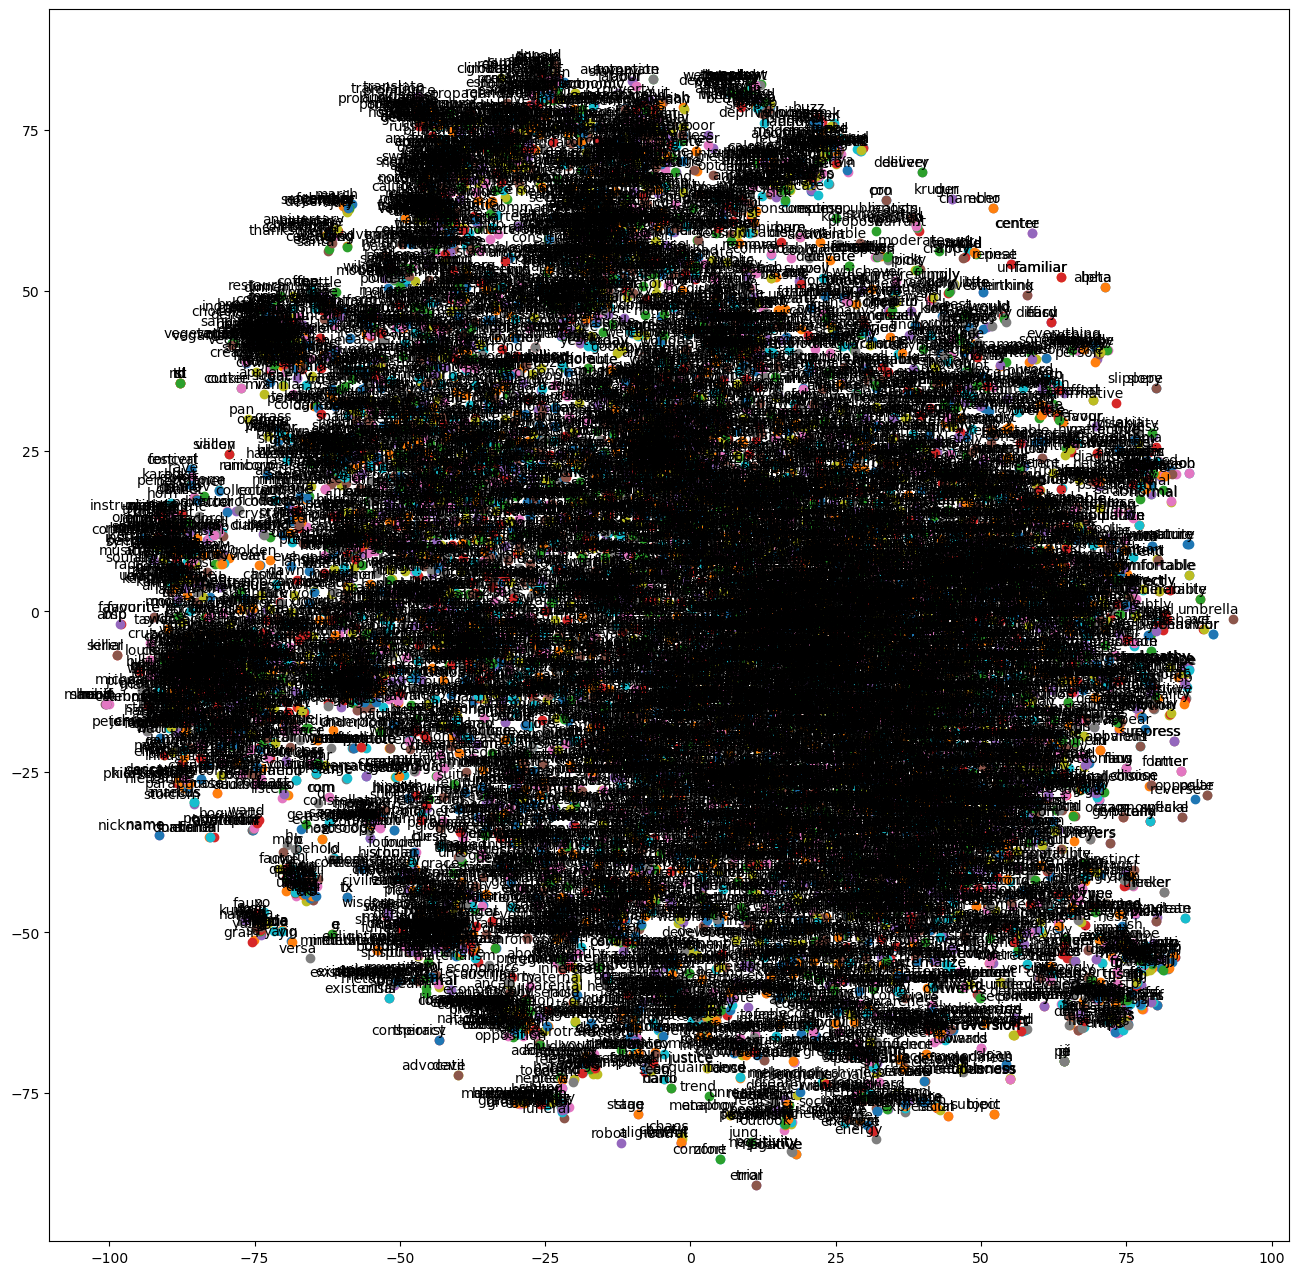

In [31]:
tsne_plot(reddit_model)

In [32]:
reddit_model.wv.most_similar('love')

[('dearly', 0.7465245127677917),
 ('adore', 0.7261248826980591),
 ('madly', 0.7076004147529602),
 ('unconditionally', 0.6888042688369751),
 ('wonderful', 0.6444582343101501),
 ('unrequited', 0.6298865079879761),
 ('lover', 0.6244319081306458),
 ('unconditional', 0.6207083463668823),
 ('lovey', 0.6117437481880188),
 ('amaze', 0.5876663327217102)]

In [33]:
reddit_model.wv.most_similar('hate')

[('despise', 0.7412739992141724),
 ('hat', 0.7311959266662598),
 ('dislike', 0.7087740898132324),
 ('ugh', 0.6370726227760315),
 ('detest', 0.5888304710388184),
 ('hater', 0.5580515265464783),
 ('abhor', 0.556562602519989),
 ('annoy', 0.5551272034645081),
 ('piss', 0.5234099626541138),
 ('awful', 0.5064893960952759)]

In [34]:
reddit_model.save("reddit_word2vec.model")

### Training models

In [ ]:
# load saved model to continue training
reddit_model = word2vec.Word2Vec.load("reddit_word2vec.model")

In [36]:
# computes the average word vector for each post
def create_word_embedding(doc, model):
    return np.mean([model.wv[word] for word in doc.split() if word in model.wv], axis=0)

# creates a word embedding for each post 
reddit_df['embeddings'] = reddit_df['posts'].apply(lambda x: create_word_embedding(x, reddit_model))
reddit_df.head(5)

,posts,type,embeddings
0,know intj tool use interaction people excuse a...,INTJ,"[-0.05639318, 0.06377263, 0.5387382, -0.585583..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,"[0.057331916, 0.23846094, 0.47360423, -0.37332..."
2,preferably p hd low except wew lad video p min...,INTJ,"[-0.21722996, -0.10877652, 0.35232732, -0.9210..."
3,drink like wish could drink red wine give head...,INTJ,"[0.009839877, 0.019125545, 0.14554444, -0.3337..."
4,space program ah bad deal meing freelance max ...,INTJ,"[-0.43660063, 0.1633324, 0.1951304, -0.8567661..."


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

mbti_types = reddit_df['type']
label_encoder = LabelEncoder()

# create train and test split on word embeddings
X_reddit = np.array(reddit_df['embeddings'].to_list())
y_reddit = label_encoder.fit_transform(mbti_types)

# stratify ensures both train and test sets will have same class distribution as original dataset
X_train_reddit, X_test_reddit, y_train_reddit, y_test_reddit = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=3, stratify=y_reddit)

X_train_reddit.shape, y_train_reddit.shape, X_test_reddit.shape, y_test_reddit.shape

((84853, 100), (84853,), (21214, 100), (21214,))